In [227]:
import pandas as pd
from datetime import datetime
%matplotlib inline

In [228]:
path = "COVID19Cases_geoRegion_AKL10_w.csv"

In [229]:
df_impf1 = pd.read_csv(path)

In [230]:
df_impf1[df_impf1["geoRegion"] == "ZH"].tail(10)

,altersklasse_covid19,geoRegion,datum,entries,sumTotal,freq,prct,pop,inz_entries,inzsumTotal,...,entries_diff_abs,entries_diff_inz,entries_diff_pct,prct_diff,timeframe_all,timeframe_phase2,timeframe_phase2b,timeframe_phase3,timeframe_28d,timeframe_14d
18896,0 - 9,ZH,202121,48,2913,0.072,7.2,162354.0,29.57,1794.23,...,-22.0,-13.55,-31.4,0.1,True,True,True,True,True,True
18923,10 - 19,ZH,202121,102,11767,0.152,15.2,141741.0,71.96,8301.76,...,-37.0,-26.11,-26.6,1.1,True,True,True,True,True,True
18950,20 - 29,ZH,202121,124,19324,0.185,18.5,187257.0,66.22,10319.51,...,-32.0,-17.09,-20.5,2.7,True,True,True,True,True,True
18977,30 - 39,ZH,202121,123,21274,0.184,18.4,253964.0,48.43,8376.78,...,-105.0,-41.35,-46.1,-4.7,True,True,True,True,True,True
19004,40 - 49,ZH,202121,113,18888,0.169,16.9,228236.0,49.51,8275.64,...,-67.0,-29.36,-37.2,-1.4,True,True,True,True,True,True
19031,50 - 59,ZH,202121,93,17166,0.139,13.9,220632.0,42.15,7780.38,...,-42.0,-19.04,-31.1,0.2,True,True,True,True,True,True
19058,60 - 69,ZH,202121,39,9148,0.058,5.8,151391.0,25.76,6042.63,...,-16.0,-10.57,-29.1,0.2,True,True,True,True,True,True
19085,70 - 79,ZH,202121,19,5600,0.028,2.8,118213.0,16.07,4737.21,...,8.0,6.76,72.7,1.7,True,True,True,True,True,True
19112,80+,ZH,202121,8,6297,0.012,1.2,75487.0,10.60,8341.83,...,-4.0,-5.30,-33.3,0.0,True,True,True,True,True,True
19139,Unbekannt,ZH,202121,0,22,0.000,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,True,True,True,True,True,True


In [231]:
df_impf1["datum"] = df_impf1["datum"].astype(str) + "1"

In [232]:
# Datumszeile von Text in Datum umwandeln
df_impf1["datum"] = pd.to_datetime((df_impf1["datum"]), format='%Y%W%w')

## Datumsbereich festlegen

In [212]:
start = input("Startdatum wie folgt eingeben: yyyy-mm-dd ")
ende = input("Enddatum wie folgt eingeben: yyyy-mm-dd ")

start = pd.to_datetime(start, format='%Y-%m-%d')
ende = pd.to_datetime(ende, format='%Y-%m-%d')

Startdatum wie folgt eingeben: yyyy-mm-dd 2021-02-01
Enddatum wie folgt eingeben: yyyy-mm-dd 2021-06-01


In [233]:
df_Mai = df_impf1[(df_impf1["datum"] >= start) & (df_impf1["datum"] <= ende)]

In [234]:
#gewünschte Kantone rausfiltern
#df_MaiGross = df_Mai[(df_Mai["geoRegion"] == "ZH") | (df_Mai["geoRegion"] == "AG") | (df_Mai["geoRegion"] == "LU") | (df_Mai["geoRegion"] == "SH") | (df_Mai["geoRegion"] == "TG") | (df_Mai["geoRegion"] == "SZ")  | (df_Mai["geoRegion"] == "ZG")] 
df_MaiGross = df_Mai[(df_Mai["geoRegion"] == "ZH") | (df_Mai["geoRegion"] == "ZG") | (df_Mai["geoRegion"] == "SG") | (df_Mai["geoRegion"] == "TG")] 

In [235]:
#gewünschte Altersklasse rausfiltern
df_MaiGross = df_MaiGross[(df_MaiGross["altersklasse_covid19"] == "0 - 9")] 
#df_MaiGross = df_MaiGross[(df_MaiGross["altersklasse_covid19"] == "10 - 19")] 

In [236]:
df_Mai.columns

Index(['altersklasse_covid19', 'geoRegion', 'datum', 'entries', 'sumTotal',
       'freq', 'prct', 'pop', 'inz_entries', 'inzsumTotal', 'type',
       'type_variant', 'version', 'datum_unit', 'datum_dboardformated',
       'entries_diff_abs', 'entries_diff_inz', 'entries_diff_pct', 'prct_diff',
       'timeframe_all', 'timeframe_phase2', 'timeframe_phase2b',
       'timeframe_phase3', 'timeframe_28d', 'timeframe_14d'],
      dtype='object')

In [237]:
# weglöschen der unnötigen Zahlen
df_MaiGross = df_MaiGross.drop(['entries', 'sumTotal', 'prct', 'pop', 'inzsumTotal', 'type',
       'type_variant', 'version', 'datum_unit', 'datum_dboardformated',
       'entries_diff_abs', 'entries_diff_inz', 'entries_diff_pct', 'prct_diff',
       'timeframe_all', 'timeframe_phase2', 'timeframe_phase2b',
       'timeframe_phase3', 'timeframe_28d', 'timeframe_14d'], axis = 1)

In [238]:
df_MaiGross.head(3)

,altersklasse_covid19,geoRegion,datum,freq,inz_entries
14566,0 - 9,SG,2021-02-01,0.048,56.79
14570,0 - 9,TG,2021-02-01,0.034,23.95
14575,0 - 9,ZG,2021-02-01,0.088,128.73


In [239]:
df_pivot = df_MaiGross.pivot(index='datum', columns='geoRegion', values='inz_entries')
df_pivot.head(3)

geoRegion,SG,TG,ZG,ZH
datum,,,,
2021-02-01,56.79,23.95,128.73,62.83
2021-02-08,24.61,23.95,75.72,47.43
2021-02-15,15.14,23.95,15.14,32.64


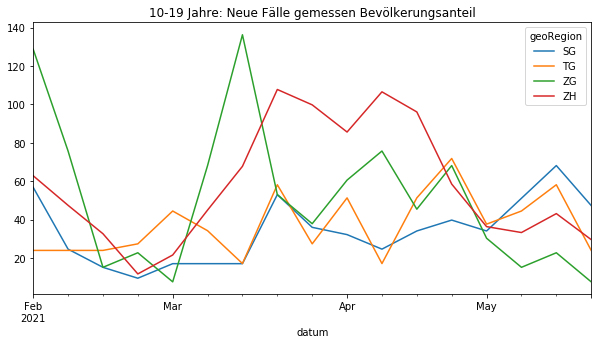

In [240]:
df_pivot.plot(figsize = (10,5), title='10-19 Jahre: Neue Fälle gemessen Bevölkerungsanteil')
